In [168]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt

In [169]:
# Read data
indexDataProcessed = pd.read_csv("./data/indexProcessed.csv")
indexInfo = pd.read_csv("./data/indexInfo.csv")

In [170]:
# Convert types to optimal type, and change dates into datetime objects
index_df = indexDataProcessed.convert_dtypes()
index_df["Date"] = pd.to_datetime(index_df["Date"])

In [171]:
index_df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0,338.923013


In [172]:
index_df.Index.value_counts()

NYA          13947
N225         13874
IXIC         12690
GSPTSE       10526
HSI           8492
GDAXI         8438
SSMI          7671
TWII          5869
000001.SS     5791
399001.SZ     5760
N100          5474
NSEI          3346
J203.JO       2346
Name: Index, dtype: Int64

In [173]:
indexInfo.head(15)

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY
5,Europe,Euronext,N100,EUR
6,China,Shenzhen Stock Exchange,399001.SZ,CNY
7,Canada,Toronto Stock Exchange,GSPTSE,CAD
8,India,National Stock Exchange of India,NSEI,INR
9,Germany,Frankfurt Stock Exchange,GDAXI,EUR


In [174]:
# Get the mean of each numerical feature for each Index
means_df = pd.DataFrame({})
for i in indexInfo.Index:
    means_df[i] = index_df.loc[index_df["Index"] == i].describe().iloc[1]
means_df.T.head(15)

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
NYA,4451.778151,4468.236552,4433.695014,4452.174711,4452.174711,1215565480.748548,4452.174711
IXIC,1985.026961,1998.050288,1969.984549,1984.906795,1984.906795,991528335.697399,1984.906795
HSI,15206.355607,15303.626762,15091.048791,15200.605629,15200.605629,843019135.480452,1976.078732
000001.SS,2381.208888,2402.121747,2358.947043,2383.069135,2383.069135,106540.442065,381.291062
N225,12852.286239,12919.694377,12778.636383,12849.155197,12849.155197,39762887.490414,128.491552
N100,822.261348,826.810234,817.177209,822.153719,822.153719,195822609.444647,1003.027537
399001.SZ,7968.340421,8052.905487,7882.030536,7973.831005,7973.75866,250027.118056,1275.812961
GSPTSE,8091.106543,8128.025943,8048.288132,8090.066305,8088.084509,9620499365.380962,6714.755033
NSEI,7665.751273,7712.532773,7605.887145,7660.047238,7660.047238,183071.906754,76.600472
GDAXI,5915.54922,5956.941632,5869.720949,5914.846717,5914.846717,68303838.954729,7216.112995


In [175]:
# Get the standard deviation of each numerical feature for each Index
stdev_df = pd.DataFrame({})
for i in indexInfo.Index:
    stdev_df[i] = index_df.loc[index_df["Index"] == i].describe().iloc[2]
stdev_df.T.head(15)

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
NYA,4074.953735,4095.166918,4052.801658,4075.459366,4075.459366,1834154566.637309,4075.459366
IXIC,2491.688809,2507.997973,2472.715879,2491.74583,2491.74583,1113646117.353615,2491.74583
HSI,8134.381116,8176.760721,8076.816076,8126.747907,8126.747907,1027671276.438664,1056.477228
000001.SS,913.958767,924.695321,901.739005,915.151492,915.151492,177642.58985,146.424239
N225,8028.559838,8077.374703,7974.544681,8026.476733,8026.476733,63767170.757768,80.264767
N100,181.258352,180.974624,181.640648,181.353165,181.353165,165545928.496206,221.250861
399001.SZ,3958.723522,4006.693574,3904.819186,3961.968164,3961.938462,493747.269984,633.914906
GSPTSE,4931.159098,4954.298294,4903.05628,4929.511738,4931.585579,10439271031.224483,4091.494743
NSEI,2838.223515,2840.775215,2826.888406,2834.111753,2834.111753,224333.015869,28.341118
GDAXI,3649.999809,3671.92943,3625.892186,3649.624493,3649.624493,64759342.127163,4452.541882


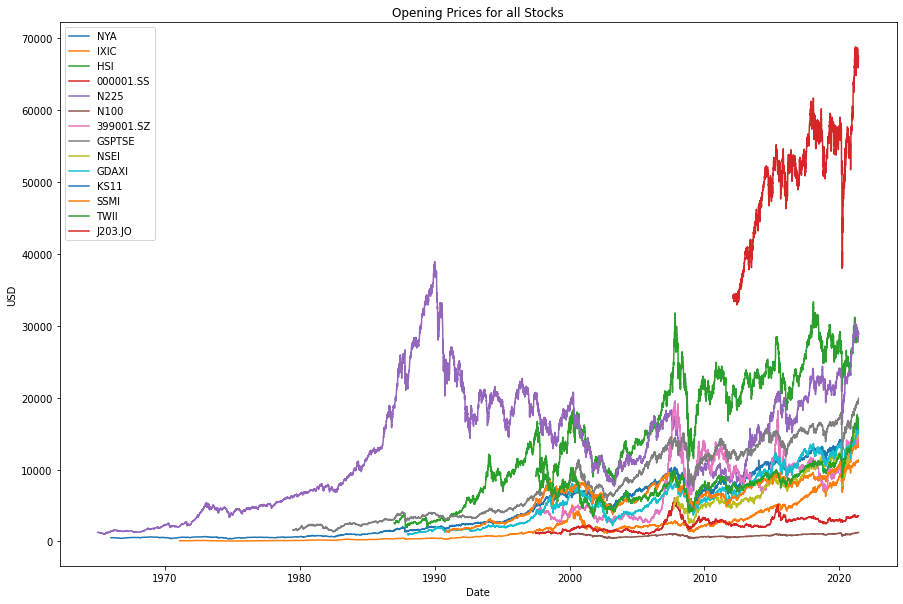

In [176]:
# Plot the opening prices of all stock exchages over time
plt.figure(figsize=(15,10))

for i in indexInfo.Index:
    X = index_df.loc[index_df["Index"] == i].Date.tolist()
    Y = index_df.loc[index_df["Index"] == i].Open.tolist()
    
    plt.plot(X, Y, label=i)

plt.title("Opening Prices for all Stocks")
plt.xlabel("Date")
plt.ylabel("USD")
plt.legend()
plt.show()

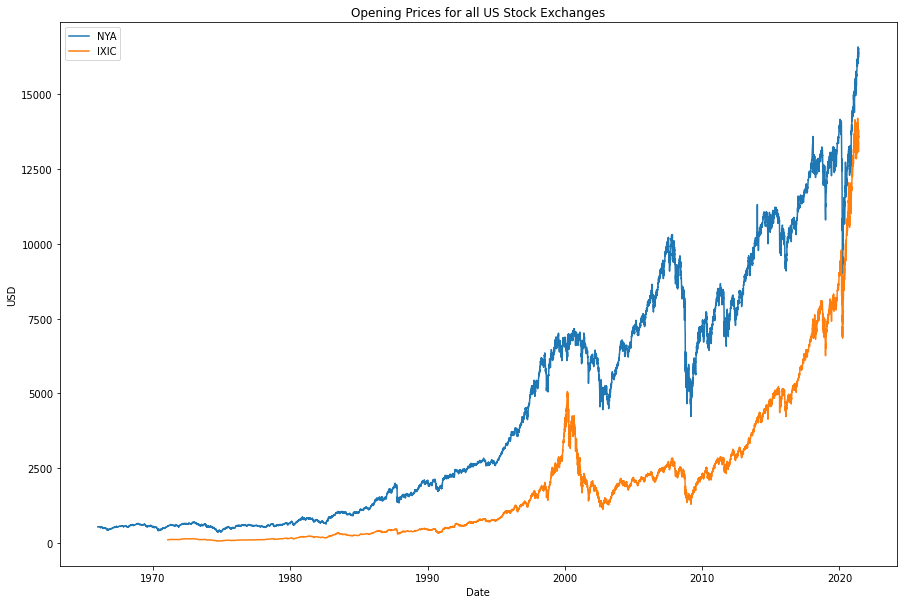

In [177]:
# Opening prices for US Stocks
plt.figure(figsize=(15,10))

for i in ["NYA", "IXIC"]:
    X = index_df.loc[index_df["Index"] == i].Date.tolist()
    Y = index_df.loc[index_df["Index"] == i].Open.tolist()
    
    plt.plot(X, Y, label=i)

plt.title("Opening Prices for all US Stock Exchanges")
plt.xlabel("Date")
plt.ylabel("USD")
plt.legend()
plt.show()

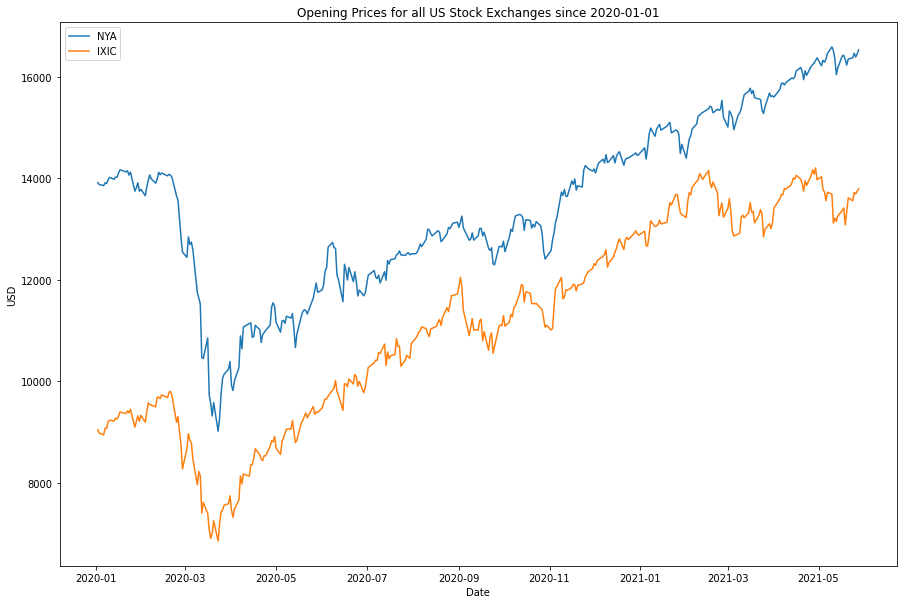

In [178]:
# USA Exchanges in the past 2 years
plt.figure(figsize=(15,10))

for i in ["NYA", "IXIC"]:
    mask = (index_df["Index"] == i) & (index_df["Date"] > "2020-01-01")
    X = index_df.loc[mask].Date.tolist()
    Y = index_df.loc[mask].Open.tolist()
    
    plt.plot(X, Y, label=i)

plt.title("Opening Prices for all US Stock Exchanges since 2020-01-01")
plt.xlabel("Date")
plt.ylabel("USD")
plt.legend()
plt.show()

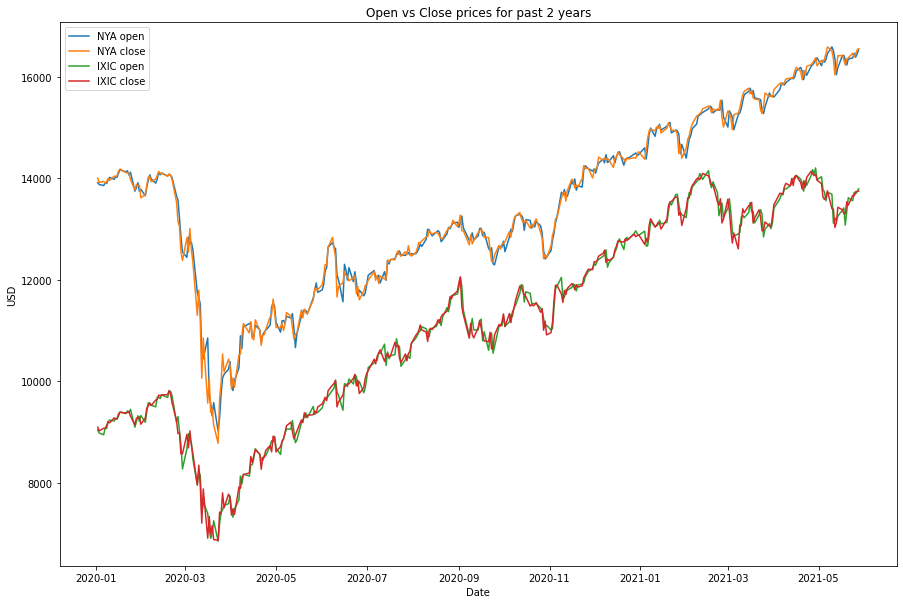

In [179]:
# Open vs close prices for the past 2 years
plt.figure(figsize=(15,10))

for i in ["NYA", "IXIC"]:
    mask = (index_df["Index"] == i) & (index_df["Date"] > "2020-01-01")
    
    xOpen = index_df.loc[mask].Date.tolist()
    xClose = index_df.loc[mask].Date.tolist()
    
    yOpen = index_df.loc[mask].Open.tolist()
    yClose = index_df.loc[mask].Close.tolist()
    
    plt.plot(xOpen, yOpen, label=f"{i} open")
    plt.plot(xClose, yClose, label=f"{i} close")
    
plt.title("Open vs Close prices for past 2 years")
plt.xlabel("Date")
plt.ylabel("USD")
plt.legend()
plt.show()

In [180]:
index_df["ra_3"] = index_df.Open.rolling(3).mean()
index_df["ra_7"] = index_df.Open.rolling(7).mean()
index_df["ra_20"] = index_df.Open.rolling(20).mean()
index_df["ra_50"] = index_df.Open.rolling(50).mean()
index_df["ra_100"] = index_df.Open.rolling(100).mean()
index_df["ra_200"] = index_df.Open.rolling(200).mean()
index_df["ra_365"] = index_df.Open.rolling(365).mean()

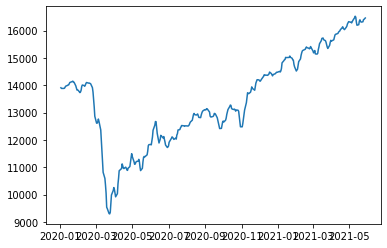

In [181]:
Y = index_df.loc[(index_df["Index"] == "NYA") & (index_df["Date"] > "2020-01-01")].ra_3.tolist()
X = index_df.loc[(index_df["Index"] == "NYA") & (index_df["Date"] > "2020-01-01")].Date.tolist()
plt.plot(X, Y)
plt.show()

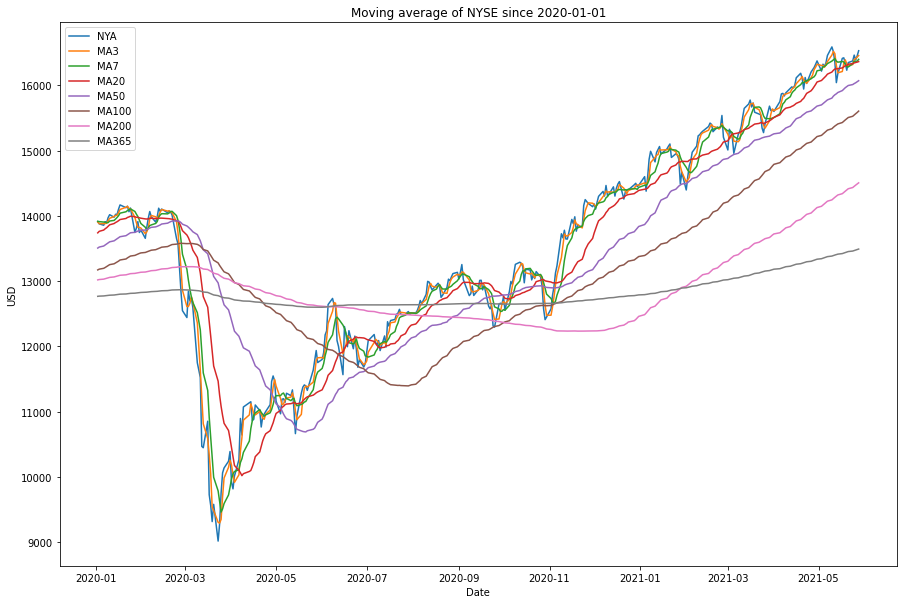

In [182]:
# NYSE moving averages open price vs real open

plt.figure(figsize=(15,10))

for i in ["NYA"]:
    mask = (index_df["Index"] == i) & (index_df["Date"] > "2020-01-01")
    X = index_df.loc[mask].Date.tolist()
    Y = index_df.loc[mask].Open.tolist()
    
    Y_ra3 = index_df.loc[mask].ra_3.tolist()
    Y_ra7 = index_df.loc[mask].ra_7.tolist()
    Y_ra20 = index_df.loc[mask].ra_20.tolist()
    Y_ra50 = index_df.loc[mask].ra_50.tolist()
    Y_ra100 = index_df.loc[mask].ra_100.tolist()
    Y_ra200 = index_df.loc[mask].ra_200.tolist()
    Y_ra365 = index_df.loc[mask].ra_365.tolist()
    
    plt.plot(X, Y, label=i)
    plt.plot(X, Y_ra3, label="MA3")
    plt.plot(X, Y_ra7, label="MA7")
    plt.plot(X, Y_ra20, label="MA20")
    plt.plot(X, Y_ra50, label="MA50")
    plt.plot(X, Y_ra100, label="MA100")
    plt.plot(X, Y_ra200, label="MA200")
    plt.plot(X, Y_ra365, label="MA365")
    
plt.title("Moving average of NYSE since 2020-01-01")
plt.xlabel("Date")
plt.ylabel("USD")
plt.legend()
plt.show()